# Insper - Computação para Ciência dos Dados
Caio Garcia

## Intro
This file is used to play with visualization examples from the documentations for Matplotlib, Seaborn and Altair.

## Setup

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt

## Graphs
### Matplotlib Example [>>](https://matplotlib.org/stable/gallery/lines_bars_and_markers/fill.html#sphx-glr-gallery-lines-bars-and-markers-fill-py)

In [2]:
def koch_snowflake(order, scale=10):
    """
    Return two lists x, y of point coordinates of the Koch snowflake.

    Parameters
    ----------
    order : int
        The recursion depth.
    scale : float
        The extent of the snowflake (edge length of the base triangle).
    """
    def _koch_snowflake_complex(order):
        if order == 0:
            # initial triangle
            angles = np.array([0, 120, 240]) + 90
            return scale / np.sqrt(3) * np.exp(np.deg2rad(angles) * 1j)
        else:
            ZR = 0.5 - 0.5j * np.sqrt(3) / 3

            p1 = _koch_snowflake_complex(order - 1)  # start points
            p2 = np.roll(p1, shift=-1)  # end points
            dp = p2 - p1  # connection vectors

            new_points = np.empty(len(p1) * 4, dtype=np.complex128)
            new_points[::4] = p1
            new_points[1::4] = p1 + dp / 3
            new_points[2::4] = p1 + dp * ZR
            new_points[3::4] = p1 + dp / 3 * 2
            return new_points

    points = _koch_snowflake_complex(order)
    x, y = points.real, points.imag
    return x, y

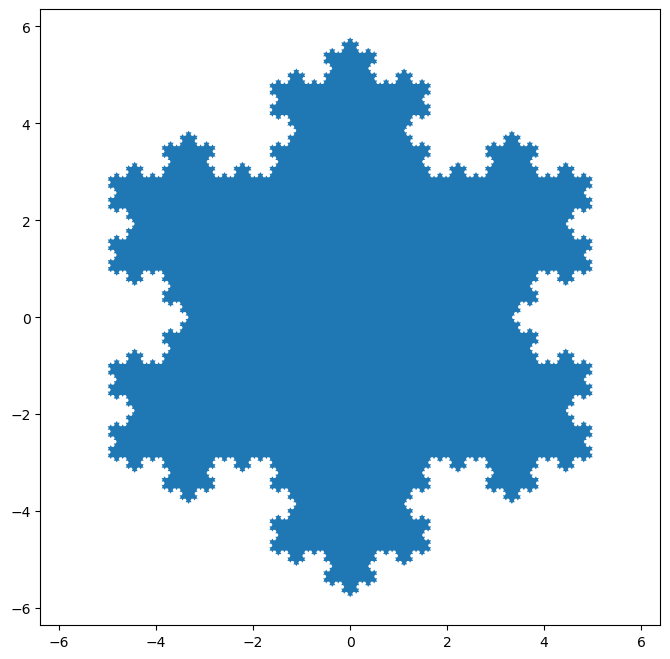

In [3]:
x, y = koch_snowflake(order=5)

plt.figure(figsize=(8, 8))
plt.axis('equal')
plt.fill(x, y)
plt.show()

### Seaborn Example [>>](https://seaborn.pydata.org/examples/smooth_bivariate_kde.html)

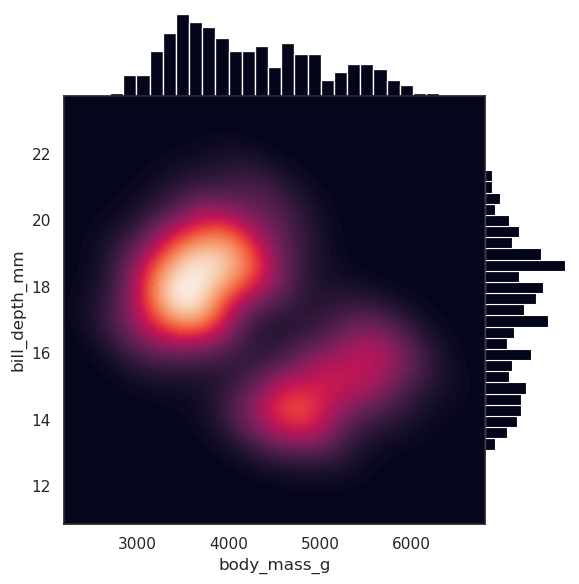

In [4]:
sns.set_theme(style="white")

df = sns.load_dataset("penguins")

g = sns.JointGrid(data=df, x="body_mass_g", y="bill_depth_mm", space=0)
g.plot_joint(sns.kdeplot,
             fill=True, clip=((2200, 6800), (10, 25)),
             thresh=0, levels=100, cmap="rocket")
g.plot_marginals(sns.histplot, color="#03051A", alpha=1, bins=25)

### Altair Example [>>](https://altair-viz.github.io/gallery/scatter_with_minimap.html)

In [4]:
from vega_datasets import data

source = data.seattle_weather()

zoom = alt.selection_interval(encodings=["x", "y"])

minimap = (
    alt.Chart(source)
    .mark_point()
    .add_params(zoom)
    .encode(
        x="date:T",
        y="temp_max:Q",
        color=alt.condition(zoom, "weather", alt.value("lightgray")),
    )
    .properties(
        width=200,
        height=200,
        title="Minimap -- click and drag to zoom in the detail view",
    )
)

detail = (
    alt.Chart(source)
    .mark_point()
    .encode(
        alt.X("date:T").scale(domain={"param": zoom.name, "encoding": "x"}),
        alt.Y("temp_max:Q").scale(domain={"param": zoom.name, "encoding": "y"}),
        color="weather",
    )
    .properties(width=600, height=400, title="Seattle weather -- detail view")
)

detail | minimap

alt.HConcatChart(...)